In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2023-09-27 08:47:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-09-27 08:47:21 (99.4 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [4]:
housing_df = pd.read_csv('housing.csv')
housing_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [8]:
housing_df.shape

(20640, 10)

In [9]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

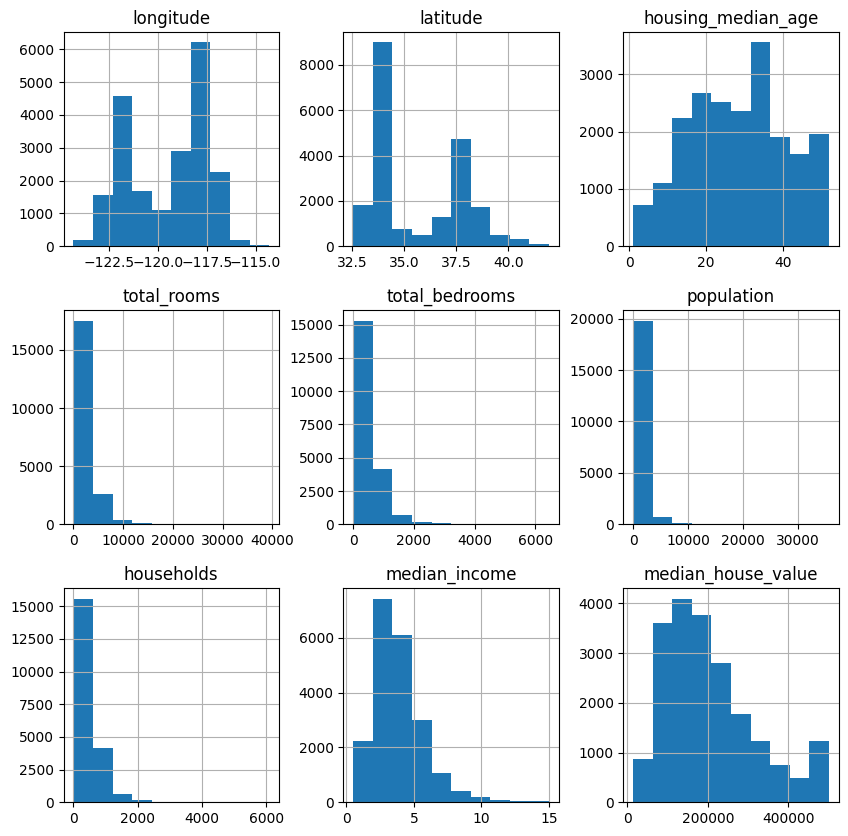

In [12]:
housing_df[features].hist(figsize=(10, 10))

In [13]:
filtered_df = housing_df[housing_df['ocean_proximity'].isin(['<1H OCEAN']) | housing_df['ocean_proximity'].isin(['INLAND'])]
filtered_df.head(2)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN


In [14]:
filtered_df.shape

(15687, 10)

In [15]:
filtered_df.ocean_proximity.nunique()

2

In [16]:
filter_df = filtered_df.drop(['ocean_proximity'], axis = 1)
filter_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0


In [17]:
filter_df.shape

(15687, 9)

In [18]:
filter_df.population.median()

1195.0



---



---



***QUESTION 3***

In [19]:
n = len(filter_df)
n

15687

In [20]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = int(n - (n_val + n_test))

In [21]:
n, n_train, n_val,  n_test, (n_val + n_test + n_train)

(15687, 9413, 3137, 3137, 15687)

In [22]:
idx = np.arange(n)

In [23]:
np.random.seed(42)
np.random.shuffle(idx)

In [24]:
df_train = filter_df.iloc[idx[:n_train]]
df_val = filter_df.iloc[idx[n_train:n_train+n_val]]
df_test = filter_df.iloc[idx[n_train+n_val:]]

print(df_train.shape, df_val.shape, df_test.shape)

(9413, 9) (3137, 9) (3137, 9)


In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_test.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0


In [26]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

len(y_train), len(y_val), len(y_test)

(9413, 3137, 3137)

In [27]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [28]:
df_train.total_bedrooms.isnull().sum(), df_val.total_bedrooms.isnull().sum(), df_test.total_bedrooms.isnull().sum()

(94, 29, 34)

In [29]:
df_train_mean = df_train.total_bedrooms.mean().round(3)

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]



def prepare_X_housing(df, missing=0):
    df = df.copy()

    if (missing == 0):
        df = df.fillna(0.0)

    else:
        df = df.fillna(df_train_mean)

    X = df.values

    return X



def rsme(y, y_pred):
    sqerror = (y - y_pred)**2
    mse = sqerror.mean()
    return np.sqrt(mse)

In [52]:
df_train1 = df_train.copy()
df_train2 = df_train.copy()
df_train3 = df_train.copy()

df_val1 = df_val.copy()
df_val2 = df_val.copy()
df_val3 = df_val.copy()


In [54]:
X_train = prepare_X_housing(df_train1, 0)

# Train model
w0, w = train_linear_regression(X_train, y_train)

# Get Prediction on validation dataset
X_val = prepare_X_housing(df_val1, 0)
y_pred = w0 + X_val.dot(w)

# Compute Metrics
round(rsme(y_pred, y_val),2), rsme(y_pred, y_val)

(0.34, 0.34084790341633553)

In [55]:
# Model training using Train Dataset
X_train = prepare_X_housing(df_train1, 1)
w0, w = train_linear_regression(X_train, y_train)

# Get Prediction on validation dataset
X_val = prepare_X_housing(df_val1, 1)
y_pred = w0 + X_val.dot(w)

# Compute Metrics
round(rsme(y_pred, y_val),2), rsme(y_pred, y_val)

(0.34, 0.3405699801249924)

## **QUESTION 4**

In [56]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [57]:
# Prepare X-data
X_train = prepare_X_housing(df_train1, 0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

    # Train model
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    # Get Prediction on validation dataset
    X_val = prepare_X_housing(df_val1, 0)
    y_pred = w0 + X_val.dot(w)

    # Compute Metrics
    print(r, round(rsme(y_pred, y_val),2), rsme(y_pred, y_val))

0 0.34 0.34084790341633553
1e-06 0.34 0.3408479061802086
0.0001 0.34 0.34084818005587364
0.001 0.34 0.34085069219066816
0.01 0.34 0.3408779300463593
0.1 0.34 0.3412862042006676
1 0.34 0.3448958327652402
5 0.35 0.34773980704861435
10 0.35 0.3483149833520271


### **QUESTION 5**

In [58]:
def split_data(df, seed):
    n = len(filter_df)

    # 60/20/20 distribution
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test

    # Shuffle
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Shuffle dataset
    df_train = filter_df.iloc[idx[:n_train]]
    df_val   = filter_df.iloc[idx[n_train: n_train+n_val]]
    df_test  = filter_df.iloc[idx[n_train+n_val:]]

    # Y -vals
    y_train = np.log1p(df_train.median_house_value)
    y_val   = np.log1p(df_val.median_house_value)
    y_test  = np.log1p(df_test.median_house_value)

    return df_train, df_val, df_test, y_train, y_val, y_test

In [59]:
list_rsme = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # split data with seed specified
    df_train, df_val, df_test, y_train, y_val, y_test = split_data(filter_df, seed)

    # Model training using Train Dataset
    X_train = prepare_X_housing(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    # Get Prediction on validation dataset
    X_val = prepare_X_housing(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    # Compute Metrics
    score = rsme(y_pred, y_val)
    list_rsme.append(score)
    print(seed, score, rsme(y_pred, y_val))

# compute std of rsmes
print(round(np.std(list_rsme), 3))

0 0.172137747827264 0.172137747827264
1 0.17034633901836269 0.17034633901836269
2 0.1716570322187996 0.1716570322187996
3 0.16170941189400323 0.16170941189400323
4 0.16974336556425565 0.16974336556425565
5 0.17410125023019843 0.17410125023019843
6 0.16970803487152075 0.16970803487152075
7 0.17312646461464523 0.17312646461464523
8 0.17780161011839343 0.17780161011839343
9 0.16744665193484845 0.16744665193484845
0.004


### **QUESTION 6**

In [61]:
seed = 9

# split data with seed specified
df_train, df_val, df_test, y_train, y_val, y_test = split_data(filter_df, seed)

In [62]:
# Combine train & val
df_train_full = pd.concat([df_train, df_val])
y_train_full  = np.concatenate([y_train, y_val])

In [63]:
# Model training using Train Dataset
X_train_full = prepare_X_housing(df_train_full, 0)
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)

# Get Prediction on validation dataset
X_test = prepare_X_housing(df_test, 0)
y_pred = w0 + X_test.dot(w)

# Compute Metrics
score = rsme(y_pred, y_test)
print(seed, score)

9 0.16556795121953988
